In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,7,1)
import warnings
warnings.simplefilter('ignore')

In [2]:
google = web.DataReader("GOOGL","yahoo",start, end)
dxc = web.DataReader("DXC","yahoo",start, end)

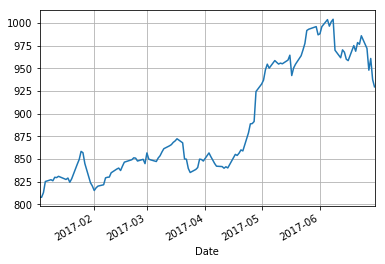

In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
google["Adj Close"].plot(grid = True)

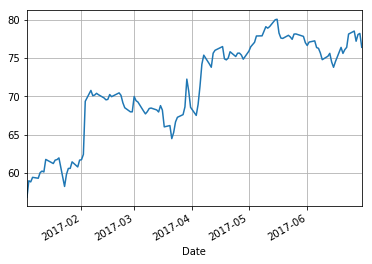

In [4]:
dxc["Adj Close"].plot(grid = True)

In [5]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    mondays = WeekdayLocator(MONDAY)        
    alldays = DayLocator()              
    dayFormatter = DateFormatter('%d')
 
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) 
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) 
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0])
            grouped = transdat.groupby(list(set(["year",stick]))) 
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) 
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []})
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d') 
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
  
    candlestick_ohlc(ax, list(zip(list(matplotlib.dates.date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)

    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(figsize = (9,9), ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

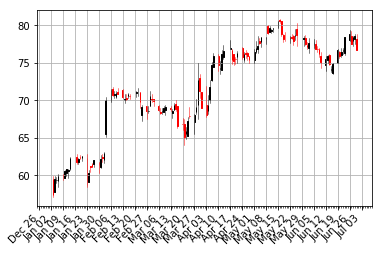

In [6]:
pandas_candlestick_ohlc(dxc)

In [7]:
stocks = pd.DataFrame({"GOOGLE": google["Adj Close"],
                      "DXC": dxc["Adj Close"]})
stocks.tail()

,DXC,GOOGLE
Date,,
2017-06-26,78.531090,972.090027
2017-06-27,77.206467,948.090027
2017-06-28,78.082916,961.010010
2017-06-29,78.222351,937.820007
2017-06-30,76.409706,929.679993


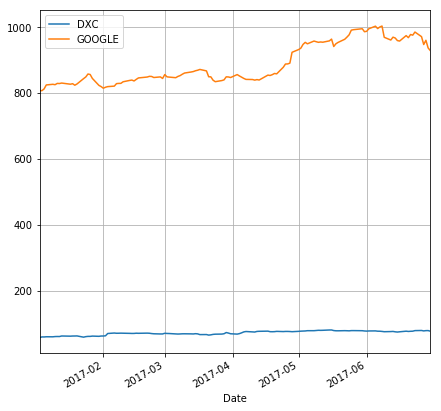

In [8]:
%matplotlib inline
stocks.plot(figsize=(7,7), grid = True)

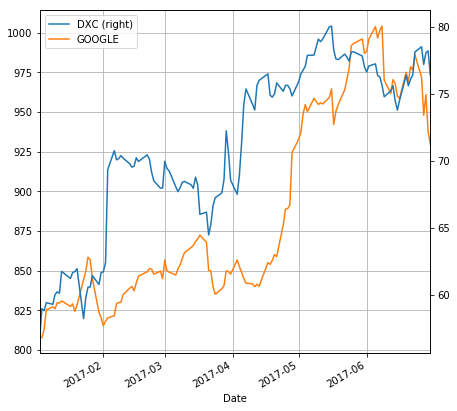

In [9]:
stocks.plot(figsize=(7,7), secondary_y = ["DXC"], grid = True)

In [10]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,DXC,GOOGLE
Date,,
2017-01-03,1.000000,1.000000
2017-01-04,1.038045,0.999703
2017-01-05,1.035428,1.006200
2017-01-06,1.045899,1.021287
2017-01-09,1.043805,1.023725


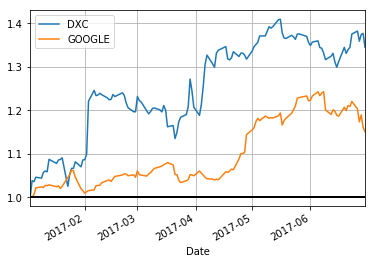

In [11]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [12]:
import numpy as np
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change.head()

,DXC,GOOGLE
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.037339,-0.000297
2017-01-05,-0.002525,0.006478
2017-01-06,0.010062,0.014882
2017-01-09,-0.002004,0.002384


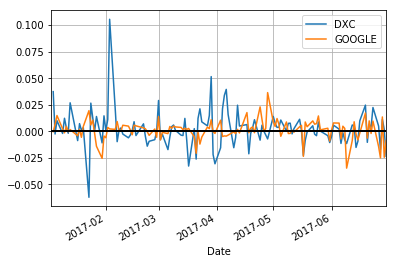

In [13]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

# Moving Averages

In [14]:
dxc['10d'] = np.round(dxc['Close'].rolling(window = 10, center = True).mean(),2)

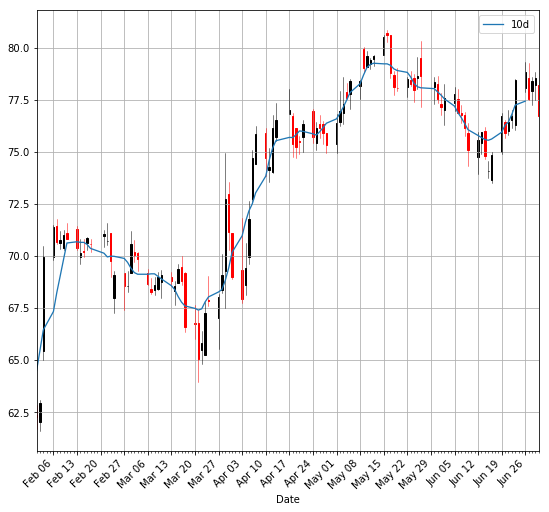

In [15]:
pandas_candlestick_ohlc(dxc.loc['2017-02-01':'2017-07-01',:], otherseries = "10d")

In [16]:
start = datetime.datetime(2015,1,1)
dxc = web.DataReader("DXC", "yahoo", start, end)

In [17]:
dxc["20d"] = np.round(dxc["Close"].rolling(window = 20, center = True).mean(), 2)

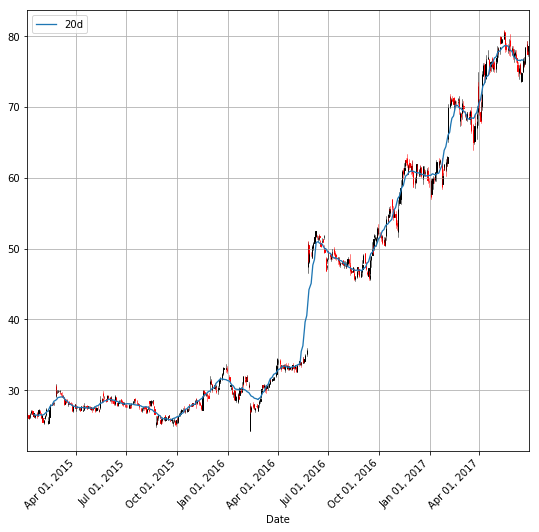

In [18]:
pandas_candlestick_ohlc(dxc.loc['2015-01-01':'2017-07-01',:], otherseries = "20d")

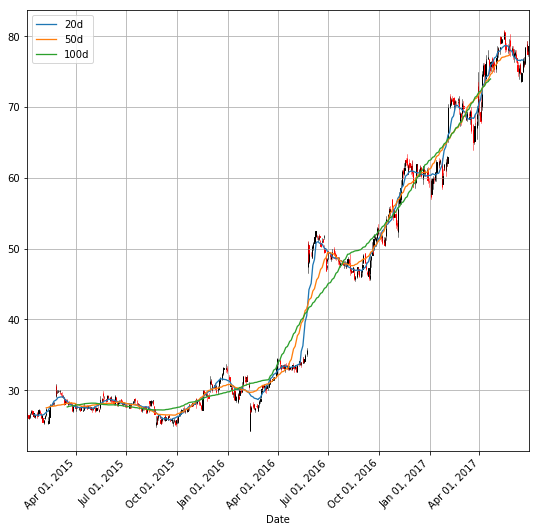

In [19]:
dxc["50d"] = np.round(dxc["Close"].rolling(window = 50, center = True).mean(), 2)
dxc["100d"] = np.round(dxc["Close"].rolling(window = 100, center = True).mean(), 2)
 
pandas_candlestick_ohlc(dxc.loc['2015-01-01':'2017-07-01',:], otherseries = ["20d", "50d", "100d"])

In [20]:
dxc['20d-50d'] = dxc['20d'] - dxc['50d']

In [21]:
dxc.head(100)

,Open,High,Low,Close,Adj Close,Volume,20d,50d,100d,20d-50d
Date,,,,,,,,,,
2014-12-31,27.088074,27.180784,26.552887,26.569742,16.170036,1350200,NaN,NaN,NaN,NaN
2015-01-02,26.679310,26.793089,26.283186,26.654024,16.221333,759700,NaN,NaN,NaN,NaN
2015-01-05,26.493889,26.536030,26.068268,26.114622,15.893055,748200,NaN,NaN,NaN,NaN
2015-01-06,26.165192,26.350611,25.958702,26.182049,15.934094,1014600,NaN,NaN,NaN,NaN
2015-01-07,26.287399,26.472818,26.021914,26.371681,16.049501,782400,NaN,NaN,NaN,NaN
2015-01-08,26.531816,26.826801,26.430679,26.670881,16.231588,1274500,NaN,NaN,NaN,NaN
2015-01-09,26.759377,27.155499,26.691952,27.092289,16.488056,955900,NaN,NaN,NaN,NaN
2015-01-12,27.050148,27.176569,26.595028,26.628740,16.205944,1064100,NaN,NaN,NaN,NaN
2015-01-13,26.755163,27.117573,26.380110,26.607670,16.193123,1200300,NaN,NaN,NaN,NaN


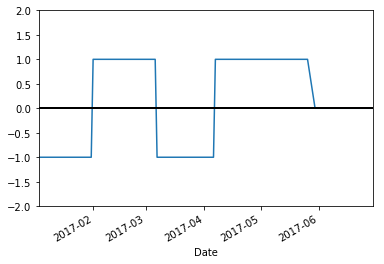

In [22]:
dxc["Regime"] = np.where(dxc['20d-50d'] > 0, 1, 0)
dxc["Regime"] = np.where(dxc['20d-50d'] < 0, -1, dxc["Regime"])
dxc.loc['2017-01-01':'2017-07-01',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

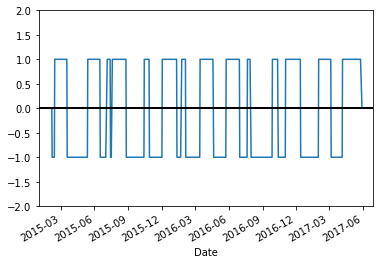

In [23]:
dxc["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [24]:
dxc["Regime"].value_counts()

-1    299
 1    280
 0     51
Name: Regime, dtype: int64

In [25]:
print(dxc["Regime"])

Date
2014-12-31    0
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    0
2015-01-08    0
2015-01-09    0
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-20    0
2015-01-21    0
2015-01-22    0
2015-01-23    0
2015-01-26    0
2015-01-27    0
2015-01-28    0
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    0
2015-02-06   -1
2015-02-09   -1
2015-02-10   -1
2015-02-11   -1
2015-02-12   -1
             ..
2017-05-19    1
2017-05-22    1
2017-05-23    1
2017-05-24    1
2017-05-25    1
2017-05-26    1
2017-05-30    0
2017-05-31    0
2017-06-01    0
2017-06-02    0
2017-06-05    0
2017-06-06    0
2017-06-07    0
2017-06-08    0
2017-06-09    0
2017-06-12    0
2017-06-13    0
2017-06-14    0
2017-06-15    0
2017-06-16    0
2017-06-19    0
2017-06-20    0
2017-06-21    0
2017-06-22    0
2017-06-23    0
2017-06-26    0
2017-06-27    0
2017-06-28    0
2017-06-29    0
2017-06-30    0
Name: Regime, Lengt

In [26]:
regime_orig = dxc.ix[-1, "Regime"]
dxc.ix[-1, "Regime"] = 0
dxc["Signal"] = np.sign(dxc["Regime"] - dxc["Regime"].shift(1))
dxc.ix[-1, "Regime"] = regime_orig
dxc.tail()

,Open,High,Low,Close,Adj Close,Volume,20d,50d,100d,20d-50d,Regime,Signal
Date,,,,,,,,,,,,
2017-06-26,78.050003,79.309998,77.860001,78.849998,78.531090,2848000,NaN,NaN,NaN,NaN,0.0,0.0
2017-06-27,78.540001,79.250000,77.500000,77.519997,77.206467,2011700,NaN,NaN,NaN,NaN,0.0,0.0
2017-06-28,77.900002,78.580002,77.260002,78.400002,78.082916,2147000,NaN,NaN,NaN,NaN,0.0,0.0
2017-06-29,78.190002,78.849998,77.470001,78.540001,78.222351,1999200,NaN,NaN,NaN,NaN,0.0,0.0
2017-06-30,78.220001,78.779999,76.720001,76.720001,76.409706,1825600,NaN,NaN,NaN,NaN,0.0,0.0


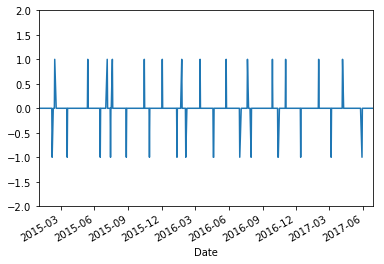

In [27]:
dxc["Signal"].plot(ylim = (-2, 2))

In [28]:
dxc["Signal"].value_counts()

 0.0    598
-1.0     17
 1.0     14
Name: Signal, dtype: int64

In [30]:
dxc.loc[dxc["Signal"] == 1, "Close"]

Date
2015-02-13    27.855036
2015-05-14    28.352297
2015-07-06    27.855036
2015-07-20    28.415508
2015-10-15    27.012220
2015-12-03    30.070000
2016-01-25    29.790001
2016-03-15    30.900000
2016-05-25    50.650002
2016-07-22    47.959999
2016-09-28    52.900002
2016-11-03    53.480000
2017-02-01    62.250000
2017-04-07    75.870003
Name: Close, dtype: float64

In [31]:
dxc.loc[dxc["Signal"] == -1, "Close"]

Date
2015-02-06    27.399916
2015-03-19    28.141592
2015-06-17    28.364939
2015-07-15    28.613569
2015-08-27    26.396965
2015-10-29    27.888748
2016-01-12    29.809999
2016-02-05    31.490000
2016-04-20    33.139999
2016-04-21    33.080002
2016-07-01    49.430000
2016-08-01    47.840000
2016-10-13    52.939999
2016-10-14    54.189999
2016-12-14    60.639999
2017-03-07    68.290001
2017-05-30    78.339996
Name: Close, dtype: float64

In [35]:
dxc_signals = pd.concat([
        pd.DataFrame({"Price": dxc.loc[dxc["Signal"]==1, "Close"],
                                       
                      "Regime": dxc.loc[dxc["Signal"]==1, "Regime"],
                      "Signal": "Buy"}),
        pd.DataFrame({"Price": dxc.loc[dxc["Signal"] == -1,"Close"],
                      "Regime": dxc.loc[dxc["Signal"] == -1, "Regime"],
                     "Signal":"Sell"}),
                    ])
dxc_signals.sort_index(inplace = True)
dxc_signals

,Price,Regime,Signal
Date,,,
2015-02-06,27.399916,-1.0,Sell
2015-02-13,27.855036,1.0,Buy
2015-03-19,28.141592,-1.0,Sell
2015-05-14,28.352297,1.0,Buy
2015-06-17,28.364939,-1.0,Sell
2015-07-06,27.855036,1.0,Buy
2015-07-15,28.613569,-1.0,Sell
2015-07-20,28.415508,1.0,Buy
2015-08-27,26.396965,-1.0,Sell


In [55]:
dxc_long_profits = pd.DataFrame({
        "Price": dxc_signals.loc[(dxc_signals["Signal"] == "Buy") &
                                  dxc_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(dxc_signals["Price"] - dxc_signals["Price"].shift(1)).loc[
            dxc_signals.loc[(dxc_signals["Signal"].shift(1) == "Buy") & (dxc_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": dxc_signals["Price"].loc[
            dxc_signals.loc[(dxc_signals["Signal"].shift(1) == "Buy") & (dxc_signals["Regime"].shift(1) == 1)].index
        ].index
    })
dxc_long_profits

,End Date,Price,Profit
Date,,,
2015-02-13,2015-03-19,27.855036,0.286556
2015-05-14,2015-06-17,28.352297,0.012642
2015-07-06,2015-07-15,27.855036,0.758533
2015-07-20,2015-08-27,28.415508,-2.018543
2015-10-15,2015-10-29,27.012220,0.876528
2015-12-03,2016-01-12,30.070000,-0.260001
2016-01-25,2016-02-05,29.790001,1.699999
2016-03-15,2016-04-20,30.900000,2.239999
2016-05-25,2016-07-01,50.650002,-1.220002


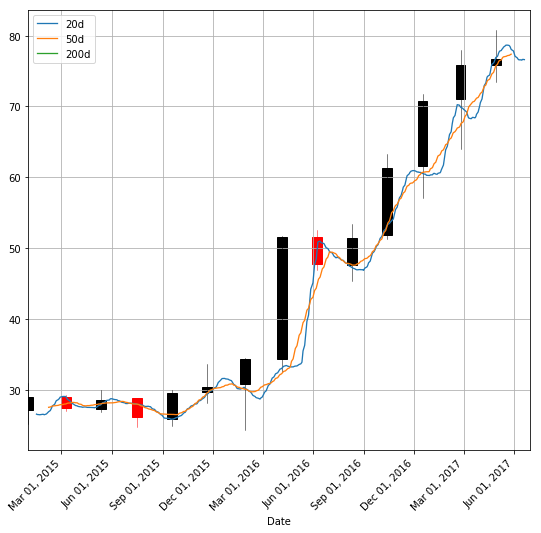

In [56]:
pandas_candlestick_ohlc(dxc, stick = 45, otherseries = ["20d", "50d", "200d"])

In [62]:
def ohlc_adj(dat):
    return pd.DataFrame({"Open":dat["Open"]*dat["Adj Close"]/dat["Close"],
                        "High": dat["High"]*dat["Adj Close"]/dat["Close"],
                        "Low": dat["Low"]*dat["Adj Close"]/dat["Close"],
                        "Close": dat["Adj Close"]})
dxc_adj = ohlc_adj(dxc)
dxc_adj.head()

,Close,High,Low,Open
Date,,,,
2014-12-31,16.170036,16.541909,16.159778,16.485487
2015-01-02,16.221333,16.305966,15.995645,16.236722
2015-01-05,15.893055,16.149519,15.864844,16.123872
2015-01-06,15.934094,16.036679,15.798168,15.923835
2015-01-07,16.049501,16.111052,15.836637,15.998208


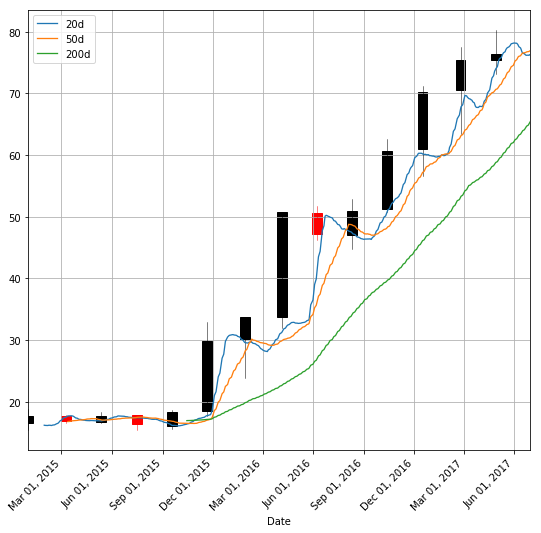

In [96]:
dxc_adj["20d"] = np.round(dxc_adj["Close"].rolling(window = 20, center = False).mean(), 2)
dxc_adj["50d"] = np.round(dxc_adj["Close"].rolling(window = 50, center = False).mean(), 2)
dxc_adj["200d"] = np.round(dxc_adj["Close"].rolling(window = 200, center = False).mean(), 2)

dxc_adj["20d-50d"] = dxc_adj["20d"] - dxc_adj["50d"]
dxc_adj["Regime"] = np.where(dxc_adj["20d-50d"]>0,1,0)
dxc_adj["Regime"] = np.where(dxc_adj["20d-50d"]<0,-1, dxc_adj["Regime"])

regim_orig = dxc_adj.ix[-1, "Regime"]
dxc_adj.ix[-1, "Regime"] = 0
dxc_adj["Signal"] = np.sign(dxc_adj["Regime"] - dxc_adj["Regime"].shift(1))
dxc_adj.ix[-1, "Regime"] = regim_orig

dxc_adj_signals = pd.concat([
        pd.DataFrame({"Price": dxc_adj.loc[dxc_adj["Signal"] == 1, "Close"],
                     "Regime": dxc_adj.loc[dxc_adj["Signal"] ==1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": dxc_adj.loc[dxc_adj["Signal"]==-1,"Close"],
                     "Regime": dxc_adj.loc[dxc_adj["Signal"]==-1, "Regime"],
                     "Signal":"Sell"})
    ])
dxc_adj_signals.sort_index(inplace=True)

dxc_adj_long_profits = pd.DataFrame({
        "Price": dxc_adj_signals.loc[(dxc_adj_signals["Signal"] == "Buy") &
                                  (dxc_adj_signals["Regime"] == 1), "Price"],
        "Profit": pd.Series(dxc_adj_signals["Price"] - dxc_adj_signals["Price"].shift(1)).loc[
            dxc_adj_signals.loc[(dxc_adj_signals["Signal"].shift(1)=="Buy")&(dxc_adj_signals["Regime"].shift(1)==1)].index].tolist(),
        "End Date": dxc_adj_signals["Price"].loc[(dxc_adj_signals["Signal"].shift(1)=="Buy")&(dxc_adj_signals["Regime"].shift(1)==1)].index
    })
pandas_candlestick_ohlc(dxc_adj, stick = 45, otherseries = ["20d", "50d", "200d"])

In [97]:
dxc_adj_long_profits.head(10)

,End Date,Price,Profit
Date,,,
2015-03-13,2015-04-08,17.277962,-0.522146
2015-05-20,2015-07-10,17.914600,-0.508808
2015-10-20,2016-02-08,16.951649,13.121740
2016-03-18,2016-08-01,30.798285,16.382638
2016-09-21,2017-01-20,50.806683,11.155338
2017-01-31,2017-06-16,61.674469,12.862839


In [98]:
tradeperiods = pd.DataFrame({"Start": dxc_adj_long_profits.index,
                            "End": dxc_adj_long_profits["End Date"]})
dxc_adj_long_profits["Low"] = tradeperiods.apply(lambda x: min(dxc_adj.loc[x["Start"]:x["End"], "Low"]), axis = 1)
dxc_adj_long_profits

,End Date,Price,Profit,Low
Date,,,,
2015-03-13,2015-04-08,17.277962,-0.522146,16.498312
2015-05-20,2015-07-10,17.914600,-0.508808,16.975473
2015-10-20,2016-02-08,16.951649,13.121740,16.839074
2016-03-18,2016-08-01,30.798285,16.382638,30.631754
2016-09-21,2017-01-20,50.806683,11.155338,49.263487
2017-01-31,2017-06-16,61.674469,12.862839,60.425113


In [100]:
cash = 1000000
dxc_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .1 
batch = 100
stoploss = .2
for index, row in dxc_adj_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"])
    trade_val = batches * batch * row["Price"]
    if row["Low"] < (1 - stoploss) * row["Price"]:
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch
    dxc_backtest = dxc_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)
 
dxc_backtest

,End Date,End Port. Value,Profit per Share,Share Price,Shares,Start Port. Value,Stop-Loss Triggered,Total Profit,Trade Value
2015-03-13,2015-04-08,9.970238e+05,-0.522146,17.277962,5700.0,1.000000e+06,0.0,-2976.2322,98484.3834
2015-05-20,2015-07-10,9.942253e+05,-0.508808,17.914600,5500.0,9.970238e+05,0.0,-2798.4440,98530.3000
2015-10-20,2016-02-08,1.070331e+06,13.121740,16.951649,5800.0,9.942253e+05,0.0,76106.0920,98319.5642
2016-03-18,2016-08-01,1.126032e+06,16.382638,30.798285,3400.0,1.070331e+06,0.0,55700.9692,104714.1690
2016-09-21,2017-01-20,1.150574e+06,11.155338,50.806683,2200.0,1.126032e+06,0.0,24541.7436,111774.7026
2017-01-31,2017-06-16,1.173727e+06,12.862839,61.674469,1800.0,1.150574e+06,0.0,23153.1102,111014.0442


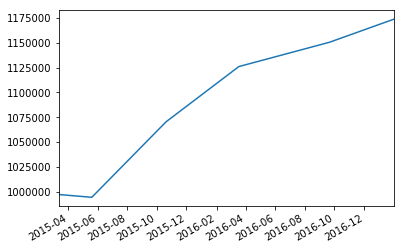

In [101]:
dxc_backtest["End Port. Value"].plot()

In [103]:
def ma_crossover_orders(stocks, fast, slow):
  
    fast_str = str(fast) + 'd'
    slow_str = str(slow) + 'd'
    ma_diff_str = fast_str + '-' + slow_str
 
    trades = pd.DataFrame({"Price": [], "Regime": [], "Signal": []})
    for s in stocks:
  
        s[1][fast_str] = np.round(s[1]["Close"].rolling(window = fast, center = False).mean(), 2)
        s[1][slow_str] = np.round(s[1]["Close"].rolling(window = slow, center = False).mean(), 2)
        s[1][ma_diff_str] = s[1][fast_str] - s[1][slow_str]
 
      
        s[1]["Regime"] = np.where(s[1][ma_diff_str] > 0, 1, 0)
        s[1]["Regime"] = np.where(s[1][ma_diff_str] < 0, -1, s[1]["Regime"])
 
        regime_orig = s[1].ix[-1, "Regime"]
        s[1].ix[-1, "Regime"] = 0
        s[1]["Signal"] = np.sign(s[1]["Regime"] - s[1]["Regime"].shift(1))
     
        s[1].ix[-1, "Regime"] = regime_orig

        signals = pd.concat([
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == 1, "Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == 1, "Regime"],
                         "Signal": "Buy"}),
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == -1, "Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == -1, "Regime"],
                         "Signal": "Sell"}),
        ])
        signals.index = pd.MultiIndex.from_product([signals.index, [s[0]]], names = ["Date", "Symbol"])
        trades = trades.append(signals)
 
    trades.sort_index(inplace = True)
    trades.index = pd.MultiIndex.from_tuples(trades.index, names = ["Date", "Symbol"])
 
    return trades
 
 
def backtest(signals, cash, port_value = .1, batch = 100):
 
    SYMBOL = 1 
    portfolio = dict()    
    port_prices = dict()  
   
    results = pd.DataFrame({"Start Cash": [],
                            "End Cash": [],
                            "Portfolio Value": [],
                            "Type": [],
                            "Shares": [],
                            "Share Price": [],
                            "Trade Value": [],
                            "Profit per Share": [],
                            "Total Profit": []})
 
    for index, row in signals.iterrows():
    
        shares = portfolio.setdefault(index[SYMBOL], 0)
        trade_val = 0
        batches = 0
        cash_change = row["Price"] * shares
        portfolio[index[SYMBOL]] = 0  
 
        old_price = port_prices.setdefault(index[SYMBOL], row["Price"])
        portfolio_val = 0
        for key, val in portfolio.items():
            portfolio_val += val * port_prices[key]
 
        if row["Signal"] == "Buy" and row["Regime"] == 1:  
            batches = np.floor((portfolio_val + cash) * port_value) // np.ceil(batch * row["Price"]) 
            trade_val = batches * batch * row["Price"]
            cash_change -= trade_val 
            portfolio[index[SYMBOL]] = batches * batch  
            port_prices[index[SYMBOL]] = row["Price"]   
            old_price = row["Price"]
        elif row["Signal"] == "Sell" and row["Regime"] == -1: 
            pass
 
        pprofit = row["Price"] - old_price   
 
      
        results = results.append(pd.DataFrame({
                "Start Cash": cash,
                "End Cash": cash + cash_change,
                "Portfolio Value": cash + cash_change + portfolio_val + trade_val,
                "Type": row["Signal"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": abs(cash_change),
                "Profit per Share": pprofit,
                "Total Profit": batches * batch * pprofit
            }, index = [index]))
        cash += cash_change 
 
    results.sort_index(inplace = True)
    results.index = pd.MultiIndex.from_tuples(results.index, names = ["Date", "Symbol"])
 
    return results
 

In [102]:
# Get more stocks
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
facebook = web.DataReader("FB", "yahoo", start, end)
twitter = web.DataReader("TWTR", "yahoo", start, end)

In [106]:
signals = ma_crossover_orders([("DXC", ohlc_adj(dxc)),
                              ("MSFT",  ohlc_adj(microsoft)),
                              ("GOOG",  ohlc_adj(google)),
                              ("FB",    ohlc_adj(facebook)),
                              ("TWTR",  ohlc_adj(twitter))],
                            fast = 20, slow = 50)
signals

Price  Regime Signal
Date       Symbol                           
2015-03-13 DXC      17.277962     1.0    Buy
           FB       78.050003     1.0    Buy
           GOOG    544.324585     1.0    Buy
           MSFT     38.624077    -1.0   Sell
           TWTR     46.660000     1.0    Buy
2015-04-08 DXC      16.755816     0.0   Sell
2015-04-09 DXC      16.680807    -1.0   Sell
2015-04-15 GOOG    529.617859    -1.0   Sell
2015-04-28 MSFT     45.885929     1.0    Buy
2015-05-05 TWTR     37.419998    -1.0   Sell
2015-05-08 FB       78.510002    -1.0   Sell
2015-05-20 DXC      17.914600     1.0    Buy
2015-06-16 FB       81.059998     1.0    Buy
2015-06-24 MSFT     42.877216    -1.0   Sell
2015-07-10 DXC      17.405792     0.0   Sell
2015-07-13 DXC      17.570093    -1.0   Sell
2015-07-16 GOOG    579.849976     1.0    Buy
2015-08-04 MSFT     44.662197     1.0    Buy
2015-09-01 MSFT     39.547535    -1.0   Sell
2015-09-02 FB       89.889999    -1.0   Sell
2015-09-16 GOOG    635.979980    -1.0   Sell
2015-10-05 FB       94.010002     1.0    Buy
2015-10-12 MSFT     44.446068     1.0    Buy
2015-10-14 TWTR     29.379999     1.0    Buy
2015-10-15 GOOG    661.739990     1.0    Buy
2015-10-20 DXC      16.951649     1.0    Buy
2015-11-19 TWTR     26.320000    -1.0   Sell
2016-01-04 FB      102.220001    -1.0   Sell
2016-01-14 GOOG    714.719971    -1.0   Sell
2016-01-15 MSFT     48.544266    -1.0   Sell
...                       ...     ...    ...
2016-08-01 DXC      47.180923    -1.0   Sell
2016-09-21 DXC      50.806683     1.0    Buy
2016-09-30 MSFT     55.963890     0.0   Sell
2016-10-03 MSFT     55.789005    -1.0   Sell
2016-10-06 GOOG    776.859985    -1.0   Sell
2016-10-10 GOOG    785.940002     1.0    Buy
2016-10-18 MSFT     56.022186     1.0    Buy
2016-10-20 MSFT     55.623837    -1.0   Sell
2016-10-21 MSFT     57.965378     1.0    Buy
2016-10-26 TWTR     17.290001    -1.0   Sell
2016-11-08 FB      124.220001    -1.0   Sell
2016-11-18 GOOG    760.539978    -1.0   Sell
2016-12-12 TWTR     18.930000     1.0    Buy
2016-12-23 GOOG    789.909973     1.0    Buy
2016-12-29 TWTR     16.389999    -1.0   Sell
2017-01-12 FB      126.620003     1.0    Buy
2017-01-20 DXC      61.962021    -1.0   Sell
2017-01-31 DXC      61.674469     1.0    Buy
2017-04-18 GOOG    836.820007    -1.0   Sell
2017-04-24 GOOG    862.760010     1.0    Buy
2017-05-03 TWTR     18.570000     0.0    Buy
2017-05-04 TWTR     18.480000     1.0    Buy
2017-06-16 DXC      74.537308    -1.0   Sell
2017-06-28 TWTR     17.950001     0.0   Sell
2017-06-29 TWTR     17.650000    -1.0   Sell
2017-06-30 DXC      76.409706    -1.0    Buy
           FB      150.979996     1.0   Sell
           GOOG    908.729980     1.0   Sell
           MSFT     68.222076     1.0   Sell
           TWTR     17.870001    -1.0    Buy

[75 rows x 3 columns]

In [107]:
bk = backtest(signals, 1000000)
bk

End Cash  Portfolio Value  Profit per Share  \
Date       Symbol                                                    
2015-03-13 DXC     9.015156e+05     1.000000e+06          0.000000   
           FB      8.078556e+05     1.000000e+06          0.000000   
           GOOG    7.534232e+05     1.000000e+06          0.000000   
           MSFT    7.534232e+05     1.000000e+06          0.000000   
           TWTR    6.554372e+05     1.000000e+06          0.000000   
2015-04-08 DXC     7.509453e+05     9.970238e+05         -0.522146   
2015-04-09 DXC     7.509453e+05     9.970238e+05         -0.597155   
2015-04-15 GOOG    8.039071e+05     9.955531e+05        -14.706726   
2015-04-28 MSFT    7.075466e+05     9.955531e+05          0.000000   
2015-05-05 TWTR    7.861286e+05     9.761491e+05         -9.240002   
2015-05-08 FB      8.803406e+05     9.767011e+05          0.459999   
2015-05-20 DXC     7.836018e+05     9.767011e+05          0.000000   
2015-06-16 FB      6.863298e+05     9.767011e+05          0.000000   
2015-06-24 MSFT    7.763720e+05     9.703828e+05         -3.008713   
2015-07-10 DXC     8.703632e+05     9.676352e+05         -0.508808   
2015-07-13 DXC     8.703632e+05     9.676352e+05         -0.344507   
2015-07-16 GOOG    8.123782e+05     9.676352e+05          0.000000   
2015-08-04 MSFT    7.185876e+05     9.676352e+05          0.000000   
2015-09-01 MSFT    8.016374e+05     9.568944e+05         -5.114662   
2015-09-02 FB      9.095054e+05     9.674904e+05          8.830001   
2015-09-16 GOOG    9.731034e+05     9.731034e+05         56.130004   
2015-10-05 FB      8.790934e+05     9.731034e+05          0.000000   
2015-10-12 MSFT    7.857567e+05     9.731034e+05          0.000000   
2015-10-14 TWTR    6.888027e+05     9.731034e+05          0.000000   
2015-10-15 GOOG    6.226287e+05     9.731034e+05          0.000000   
2015-10-20 DXC     5.260043e+05     9.731034e+05          0.000000   
2015-11-19 TWTR    6.128603e+05     9.630054e+05         -3.059999   
2016-01-04 FB      7.150803e+05     9.712154e+05          8.209999   
2016-01-14 GOOG    7.865523e+05     9.765134e+05         52.979981   
2016-01-15 MSFT    8.884953e+05     9.851197e+05          4.098198   
...                         ...              ...               ...   
2016-08-01 DXC     7.235968e+05     1.102467e+06         16.382638   
2016-09-21 DXC     6.169027e+05     1.102467e+06          0.000000   
2016-09-30 MSFT    7.288305e+05     1.110615e+06          4.073769   
2016-10-03 MSFT    7.288305e+05     1.110615e+06          3.898884   
2016-10-06 GOOG    8.065165e+05     1.114459e+06         38.440002   
2016-10-10 GOOG    7.279225e+05     1.114459e+06          0.000000   
2016-10-18 MSFT    6.214803e+05     1.114459e+06          0.000000   
2016-10-20 MSFT    7.271656e+05     1.113702e+06         -0.398349   
2016-10-21 MSFT    6.170314e+05     1.113702e+06          0.000000   
2016-10-26 TWTR    7.225004e+05     1.115227e+06          0.250000   
2016-11-08 FB      8.218764e+05     1.117299e+06          2.590004   
2016-11-18 GOOG    8.979304e+05     1.114759e+06        -25.400024   
2016-12-12 TWTR    7.881364e+05     1.114759e+06          0.000000   
2016-12-23 GOOG    7.091454e+05     1.114759e+06          0.000000   
2016-12-29 TWTR    8.042074e+05     1.100027e+06         -2.540001   
2017-01-12 FB      7.029114e+05     1.100027e+06          0.000000   
2017-01-20 DXC     8.330317e+05     1.123453e+06         11.155338   
2017-01-31 DXC     7.220176e+05     1.123453e+06          0.000000   
2017-04-18 GOOG    8.056996e+05     1.128144e+06         46.910034   
2017-04-24 GOOG    7.194236e+05     1.128144e+06          0.000000   
2017-05-03 TWTR    7.194236e+05     1.128144e+06         -0.360000   
2017-05-04 TWTR    6.066956e+05     1.128144e+06          0.000000   
2017-06-16 DXC     7.408628e+05     1.151297e+06         12.862839   
2017-06-28 TWTR    8.503578e+05     1.148064e+06         -0.529999   
2017-06-29 TWTR    8.503578e+05  

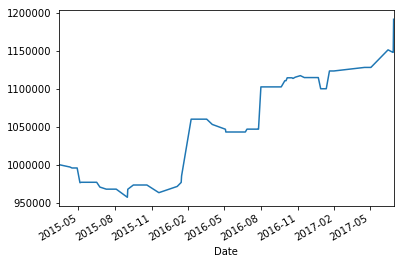

In [108]:
bk["Portfolio Value"].groupby(level = 0).apply(lambda x: x[-1]).plot()